<a href="https://colab.research.google.com/github/Al-x-R/Colab-examples/blob/master/playboy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/an-2-an/data/master/girls.csv')
df.head(10)

,Month,Year,Bust,Waist,Hips,Height,Weight
0,December,1953,91,61,91,165,54
1,March,1954,86,61,89,168,54
2,July,1955,91,61,91,166,52
3,December,1955,91,61,91,166,52
4,July,1956,91,61,86,157,48
5,August,1956,94,61,91,170,55
6,October,1956,91,61,91,166,52
7,November,1956,99,56,91,160,58
8,December,1956,89,58,89,157,48
9,January,1957,91,64,91,165,54


In [0]:
months = [
'January',
'February',
'March',
'April',
'May',
'June',
'July',
'August',
'September',
'October',
'November',
'December'
]
def get_month_index(month_name):
  if month_name in months:
    return months.index(month_name) + 1
  else:
    return -1
df['Month_index'] = df['Month'].apply(get_month_index)
df.head()

,Month,Year,Bust,Waist,Hips,Height,Weight,Month_index
0,December,1953,91,61,91,165,54,12
1,March,1954,86,61,89,168,54,3
2,July,1955,91,61,91,166,52,7
3,December,1955,91,61,91,166,52,12
4,July,1956,91,61,86,157,48,7


In [0]:
df['Date'] = pd.to_datetime(dict(year=df.Year, month=df.Month_index, day=1))
df.head()

,Month,Year,Bust,Waist,Hips,Height,Weight,Month_index,Date
0,December,1953,91,61,91,165,54,12,1953-12-01
1,March,1954,86,61,89,168,54,3,1954-03-01
2,July,1955,91,61,91,166,52,7,1955-07-01
3,December,1955,91,61,91,166,52,12,1955-12-01
4,July,1956,91,61,86,157,48,7,1956-07-01


In [0]:
df[df['Year']>2000].pivot(index='Year', columns='Month_index', values='Height')

Month_index,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2001,177.0,168.0,163.0,163.0,175.0,168.0,168.0,160.0,165.0,160.0,173.0,173.0
2002,163.0,178.0,165.0,163.0,170.0,160.0,175.0,165.0,178.0,168.0,173.0,170.0
2003,165.0,173.0,170.0,173.0,173.0,163.0,170.0,170.0,178.0,173.0,173.0,173.0
2004,157.0,170.0,163.0,177.0,163.0,163.0,170.0,166.0,165.0,165.0,168.0,168.0
2005,165.0,168.0,165.0,160.0,170.0,168.0,175.0,173.0,168.0,173.0,163.0,165.0
2006,168.0,165.0,168.0,173.0,168.0,163.0,160.0,165.0,168.0,175.0,165.0,175.0
2007,175.0,160.0,173.0,168.0,173.0,170.0,170.0,168.0,173.0,163.0,174.0,178.0
2008,175.0,170.0,163.0,NaN,170.0,170.0,165.0,157.0,170.0,165.0,168.0,173.0
2009,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#2001 - 2003годы
years = [2001, 2002, 2003]
df1 = df[pd.DatetimeIndex(df['Date']).year.isin(years)]
df1.head()

,Month,Year,Bust,Waist,Hips,Height,Weight,Month_index,Date
508,January,2001,89,62,91,177,54,1,2001-01-01
509,February,2001,86,53,84,168,45,2,2001-02-01
510,March,2001,86,64,90,163,51,3,2001-03-01
511,April,2001,81,56,81,163,47,4,2001-04-01
512,May,2001,86,64,89,175,57,5,2001-05-01


In [0]:
#2001 - 2003годы
years = [2001, 2002, 2003]
df1 = df[df['Year'].isin(years)]
df1.head()

,Month,Year,Bust,Waist,Hips,Height,Weight,Month_index,Date
508,January,2001,89,62,91,177,54,1,2001-01-01
509,February,2001,86,53,84,168,45,2,2001-02-01
510,March,2001,86,64,90,163,51,3,2001-03-01
511,April,2001,81,56,81,163,47,4,2001-04-01
512,May,2001,86,64,89,175,57,5,2001-05-01


''

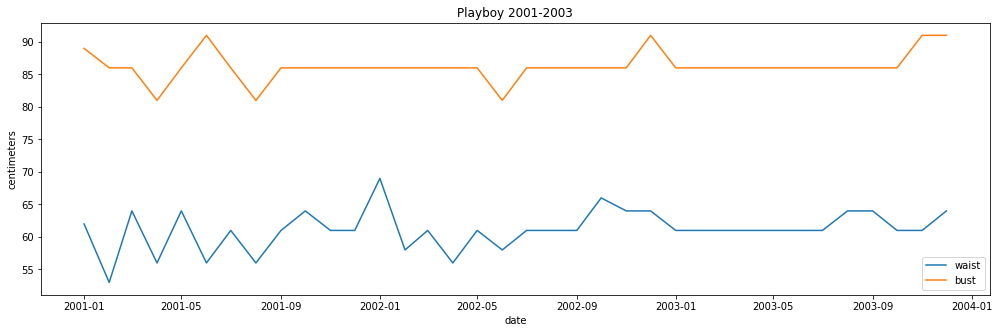

In [0]:
import matplotlib.pyplot as plt
x  = df1['Date']
y1 = df1['Waist']
y2 = df1['Bust']

plt.figure(figsize=(17, 5))

plt.plot(x, y1, label='waist')
plt.plot(x, y2, label='bust')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('centimeters')
plt.title('Playboy 2001-2003')
;


''

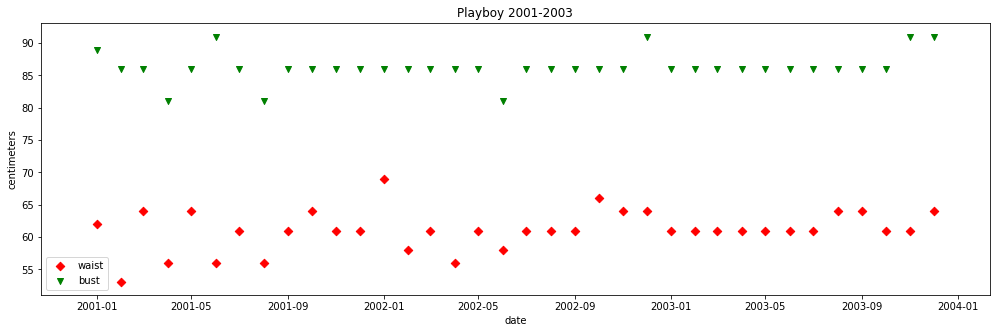

In [0]:
x  = df1['Date']
y1 = df1['Waist']
y2 = df1['Bust']

plt.figure(figsize=(17, 5))

plt.scatter(x, y1, label='waist', marker='D', color='red')
plt.scatter(x, y2, label='bust', marker='v', color='green')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('centimeters')
plt.title('Playboy 2001-2003')
;

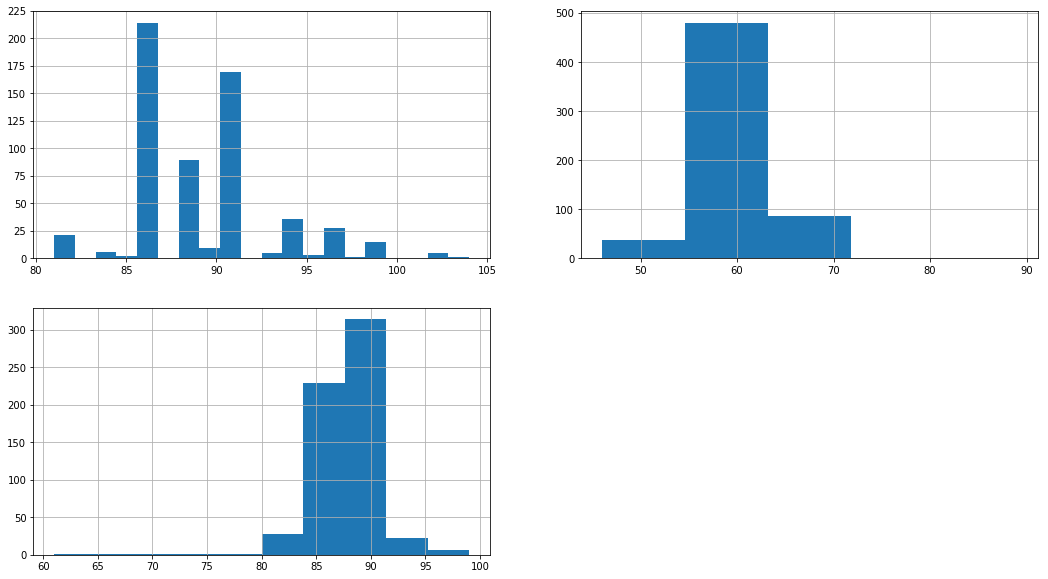

In [0]:
# 90 - 60 -90
fig = plt.figure(figsize=(18, 10))
fig.add_subplot(2, 2, 1)
df['Bust'].hist(bins=20) #bins - разбивает на группы
fig.add_subplot(2, 2, 2)
df['Waist'].hist(bins=5)
fig.add_subplot(2, 2, 3)
df['Hips'].hist();

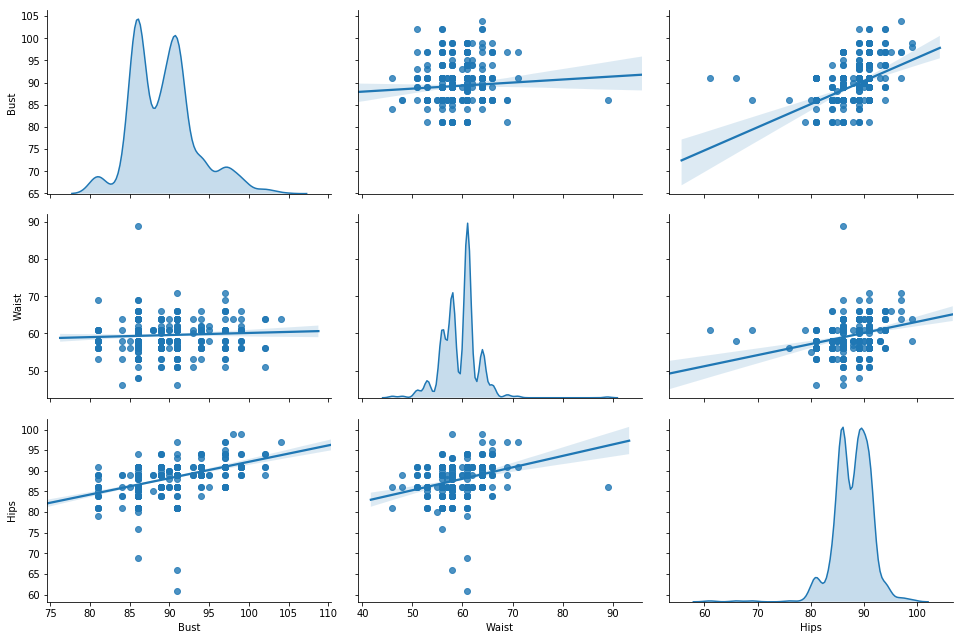

In [0]:
import seaborn as sns
sns.pairplot(df, height=3, aspect=1.5, vars=['Bust', 'Waist', 'Hips'], diag_kind='kde', kind='reg');

In [0]:
#корреляция между числовыми признаками
fields = ['Bust', 'Waist', 'Hips', 'Height', 'Weight']
corr = df[fields].corr()
corr

,Bust,Waist,Hips,Height,Weight
Bust,1.000000,0.062017,0.455448,0.090848,0.408590
Waist,0.062017,1.000000,0.287631,0.374636,0.468535
Hips,0.455448,0.287631,1.000000,0.231788,0.549841
Height,0.090848,0.374636,0.231788,1.000000,0.709458
Weight,0.408590,0.468535,0.549841,0.709458,1.000000


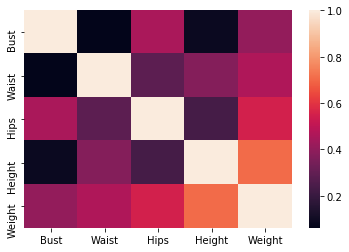

In [0]:
sns.heatmap(corr);

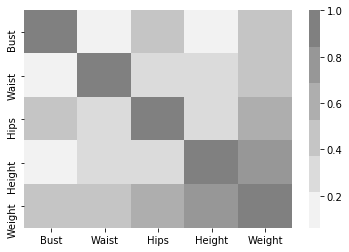

In [0]:
sns.heatmap(corr, cmap=sns.light_palette('grey'));

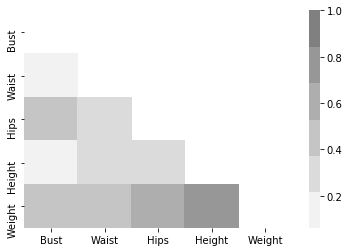

In [0]:
import numpy as np
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask, cmap=sns.light_palette('grey'));

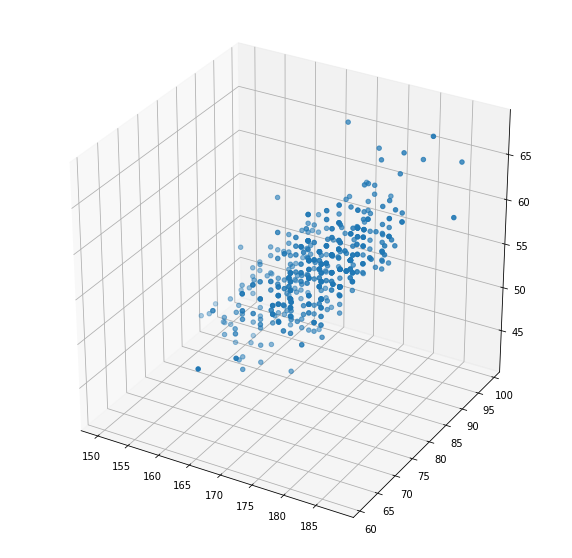

In [0]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
x1 = df['Height']
y1 = df['Hips']
z1 = df['Weight']
ax.scatter(x1, y1, z1, marker='o', label='blue');

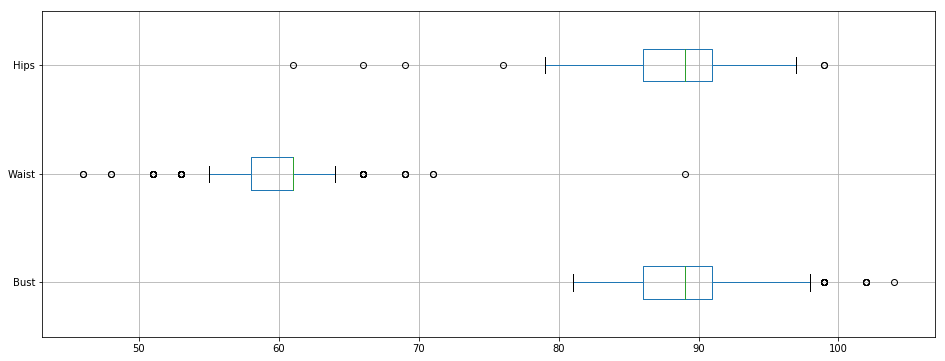

In [0]:
plt.figure(figsize=(16, 6))
df.boxplot(column=['Bust', 'Waist', 'Hips'], vert=False);

In [0]:
#построение регрессионно модели
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = df[['Height','Bust', 'Waist', 'Hips']]
y = df['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80) 


In [0]:
X_test[:5]

,Height,Bust,Waist,Hips
91,168,91,61,91
388,170,91,58,89
381,174,89,61,89
488,170,91,53,86
114,178,102,64,89


In [0]:
y_test[:5]

91     53
388    52
381    58
488    54
114    61
Name: Weight, dtype: int64

In [0]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)  #тренируем регрессию

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print(regressor.coef_) #коэф-ты регрессии

[0.39996787 0.22121484 0.18452581 0.29298795]


In [0]:
y_pred = regressor.predict(X_test) #расчетные значения у для X_test

In [0]:
for y1, y2 in zip(y_test[:10], y_pred[:10]):
  print(y1, y2)

53 53.78909881685067
52 53.44948121300746
58 55.16050043491421
54 51.64788829996564
61 60.189742246706146
54 53.45056187857878
56 54.358913929362416
50 51.21808485154108
54 53.02853772015948
46 48.86543157539691


In [0]:
len(y_test)


121

In [0]:
E = [abs(y1 - y2) / ((y1+y2)/2) for y1, y2 in zip(y_test, y_pred)]
print(E)

avg_E = sum(E) / len(E)
print(f'E среднее = {avg_E:.3f}')
print(max(E))
print(min(E))

[0.014778639872296648, 0.02749148115920104, 0.05018534831805493, 0.044527377458904144, 0.013371721703053233, 0.010226807786116447, 0.02974088838329809, 0.02406852201022519, 0.018153331822220013, 0.06041044725800949, 0.046819789321936665, 0.03558904480463437, 0.025125033536262418, 0.032007927408523075, 0.026295446650373575, 0.007141785229490953, 0.033226464149421264, 0.006867005703526009, 0.016035047954990098, 0.012833540907199004, 0.00014919484757724857, 0.03848306803423165, 0.03891847560857349, 0.03967980176906816, 0.021386053981631795, 0.006968568223883528, 0.004583635911421913, 0.08609749673897493, 0.008191449584982134, 0.023537176477906978, 0.03582890041474025, 0.006325785181201922, 0.060972876948236006, 0.028781649476977336, 0.010950797544281243, 0.03689403217951697, 0.024750689740050857, 0.016120414318821656, 0.010131264623704136, 0.008721845132015292, 0.03378541469411222, 0.0022770246741113205, 0.013752037777514471, 0.013708183255000284, 0.10414926207034778, 0.015136335691214649

In [0]:
# R2 - квадратичная оценка точности
accuracy = regressor.score(X_test, y_test)
print(accuracy)

0.7584757909995907
